In [1]:
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
from collections import Counter

## Get dtheta for each distance R

0.0 0.0
2000.0 785.3981633974482
4000.0 739.1982714328925
6000.0 769.3696294505615
8000.0 761.598219052071
10000.0 730.6029426953007
12000.0 753.9822368615504
14000.0 733.0382858376183
16000.0 728.4852530063288
18000.0 734.3982826573542
20000.0 739.1982714328925
22000.0 719.9483164476609
24000.0 724.982920059183
26000.0 729.2982945833448
28000.0 721.0212647583131
30000.0 722.2052077217916
32000.0 728.4852530063288
34000.0 712.0943348136864
36000.0 722.6666806979715
38000.0 725.717451893083
40000.0 716.0325136386992


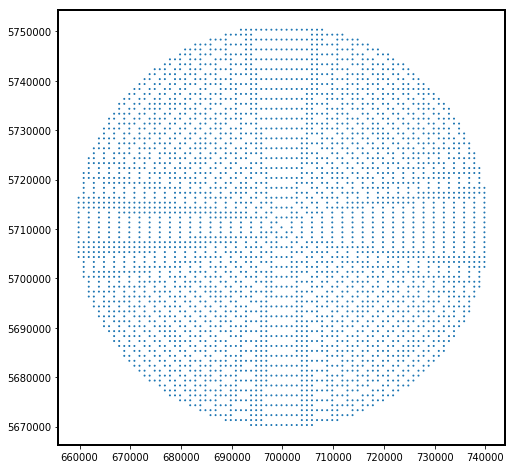

In [16]:
#choose a center (xa,ya), it is not important where
#you will need to build the surface to integrate the fluxes
plt.figure(figsize=(8,8))
dteta=dict()
X=[]
Y=[]
C=[]
for rad in np.linspace(0,40000,21): #i want to compute fluxes across surfaces of these set of radiuses from xa,ya
    ncell=0

    for nshp in centros.keys(): #call every cell
        modulox=0
        moduloy=0

        xi=centros[nshp][0]-xa
        yi=centros[nshp][1]-ya
        ri=math.sqrt((xi**2)+(yi**2)) #distance of the cell centroid from the chosen center
        if np.abs(ri-rad)<np.sqrt(2)*500: #i chose to have a crown thickness of 500m
            #if the cell centroid is in the crown R+-dR around the chosen center, go on
            fii=math.atan2(yi,xi) #angle of the cell position wrt chosen center in the plane
            X.append(centros[nshp][0])
            Y.append(centros[nshp][1])
            C.append(1) #just for debugging purposes
            ncell+=1

    if ncell!=0: #if i get at least one cell
        dteta[rad]=2*math.pi/ncell
    else: dteta[rad]=0
    
fig=plt.figure(figsize=(8,8))
plt.scatter(X,Y,C) #debug time
plt.show()

## Gauss Theorem

In [34]:

vectorfieldint=dict() #gonna define the vectorfield in each cell with module x and y

for rad in np.linspace(0,40000,21):
    vectorfieldint[rad]={}
    for nshp in chiavi:
        modulox=0
        moduloy=0
        
        x1=centros[nshp][0]-xa
        y1=centros[nshp][1]-ya
        for nsss in chiavi: #cells per cells, origin destination matrix
            conn=w.get(nshp,"error") #if key nsss is in w[nshp] dict then..
            if conn!="error":
                conn1=w[nshp].get(nsss,"error") #if key nsss is in w[nshp] dict then..
                if conn1!="error":
                    if nshp!=nsss:  #if it's not moving inside the same cell...
                        x2 = centros[nsss][0]-xa
                        y2 = centros[nsss][1]-ya
                        r2=math.sqrt((x2**2)+(y2**2))
                        if r2<rad: #only denstination cells inside the surface defined by R
                            x = x2-x1
                            y = y2-y1
                            teta = math.atan2(y,x)
                            modulox += w[nshp][nsss]*math.cos(teta)/(density[nshp])  #vectorially summing up W
                            moduloy += w[nshp][nsss]*math.sin(teta)/(density[nshp])



        vectorfieldint[rad][nshp]=(modulox,moduloy)

0.0
2000.0
4000.0
6000.0
8000.0
10000.0
12000.0
14000.0
16000.0
18000.0
20000.0
22000.0
24000.0
26000.0
28000.0
30000.0
32000.0
34000.0
36000.0
38000.0
40000.0


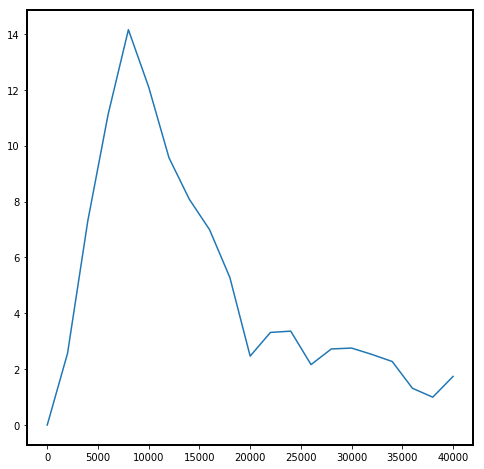

In [36]:
plt.figure(figsize=(8,8))
#choose a center (xa,ya), it is not important where
#but you need this to center the circles you need in order to compute the fluxes
#so maybe getting a realistic center will be more informative than choosing one in the suburbs
dist0=[] #computing flux empirically from data, taking the crown cells people
phi0=[]
for r in np.linspace(0,40000,21):
    print r
    flux=0
    for nshp in chiavi: #call every cell and check the density within
        
        xi=centros[nshp][0]-xa
        yi=centros[nshp][1]-ya
        ri=math.sqrt((xi**2)+(yi**2)) #radius of the cell from the chosen center
        if np.abs(ri-r)<np.sqrt(2)*500:   #cell is in the crown of R+-dR (dR=500m)
            fii=math.atan2(yi,xi) #angle of the cell position wrt chosen center

            x=vectorfieldint[r][nshp][0]
            y=vectorfieldint[r][nshp][1]

            fr = math.atan2(y,x)
            module = math.sqrt(x**2 + y**2)
            calc=-module*(math.cos(fii-fr)) #I choose entering flux is positive
            flux+=calc*r*dteta[r] #integration
                
    dist0.append(r)
    phi0.append(flux/1000) #it depends if you want to show the flux in m or km, i chose the latter
    
plt.figure(figsize=(8,8))
plt.plot(dist0,phi0)

plt.show()

In [ ]:
#if you have a grid defined by list X and Y where each cell is 1000m
#where len(x)=total number of cells (same for Y)
#you get the size of the grid by
ny=int((max(Y)-min(Y))/1000)+1
nx=int((max(X)-min(X))/1000)+1
#reshape the coordinates to 2d arrays
x1=np.reshape(X, newshape=(ny, nx))
x2=np.reshape(Y, newshape=(ny, nx))

In [ ]:

cells=range(0,len(centros)) #new index of cells
neighs=defaultdict(list) #cells neighbors dict

for i in cells:
    idy, idx = np.unravel_index(i, dims=(ny, nx)) #idx = n column, idy= n row
    neighx = (idx-1, idx+1, idx, idx) #left, down, right, here, here
    neighy = (idy, idy, idy-1, idy+1) #idy-1 means the upper neighbor
    neig=zip(neighy,neighx)
        
    for k in neig:
        #dictionary of neighbors
        neighs[i].append(np.ravel_multi_index(k, dims=(ny,nx),mode='clip'))
        #for each cell we get 4 neighbors
        #if the cell is on the grid border, the neighbor will hame the same name

In [41]:
divint=dict()

for rad in np.linspace(0,40000,21):
    divint[rad]={}
    for i in centros: #start with a point

        nsx=neighs[i][0]
        ndx=neighs[i][1]
        nup=neighs[i][2]
        ndw=neighs[i][3]
        u0=vectorfieldint[rad][i][0] #x component of the vector in the current cell
        v0=vectorfieldint[rad][i][1] #y component 

        udx=vectorfieldint[rad][ndx][0] #x component of the right neighbor cell
        vup=vectorfieldint[rad][nup][1] #y component of the upper neighbor cell
        divint[rad][i]=((udx-u0)/1000 + (vup-v0)/1000) #w field divergence in i

   

[[1.         0.97460563]
 [0.97460563 1.        ]]


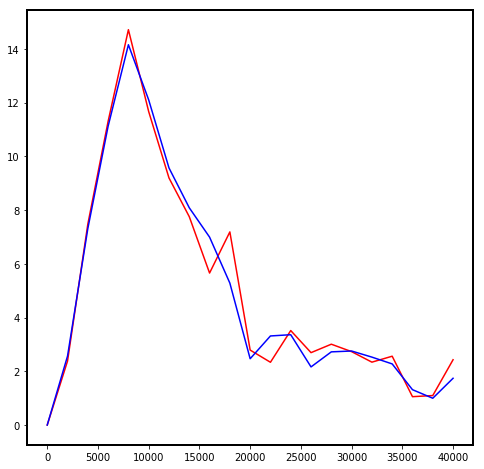

In [42]:
plt.figure(figsize=(8,8))
dist0=[] 
div0=[]
tot=0
for r in np.linspace(0,40000,21):
    tot=0
    for nshp in centros.keys(): #call every cell and check the density within
        xi=centros[nshp][0]-xa #i take one destination cell in the circumference
        yi=centros[nshp][1]-ya
        ri=math.sqrt((xi**2)+(yi**2)) #radius of the cell from the center
        if ri<r:
            tot +=-divint[r][nshp]*1000*1000 #volume integral

    dist0.append(r)
    div0.append(tot/1000) #i want to scale the flux to km
    
plt.figure(figsize=(8,8))
plt.plot(dist0,div0,'r')
plt.plot(dist0,phi0,'b')
print np.corrcoef(phi0,div0)**2
plt.show()

[[1.         0.97460563]
 [0.97460563 1.        ]]


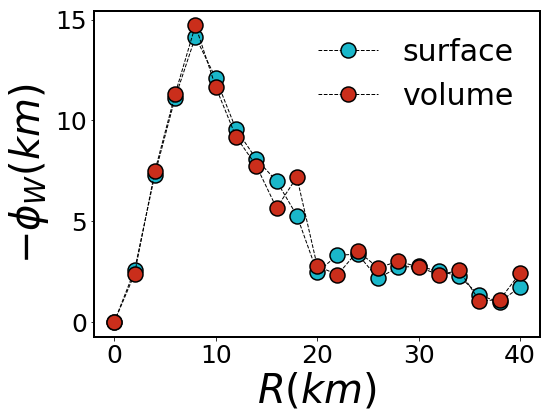

In [43]:
fig, ax=plt.subplots(figsize=(8,6))
plt.plot(dist0,phi0,'--',color='black',marker='o',markersize=15,linewidth=1,label='surface',mfc='#1ab7ca', markeredgewidth=1.5)
plt.plot(dist0,div0,'--',color='black',marker='o',markersize=15,linewidth=1,label='volume',mfc='#ca2e1b', markeredgewidth=1.5)
print np.corrcoef(phi0,div0)**2
plt.tick_params(labelsize=25)
plt.ylabel('$-\phi_W(km)$', fontsize='40')
plt.xlabel('$R(km)$',fontsize='40')
plt.legend(loc='upper right',fontsize='30',frameon=False)
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1000))
ax.xaxis.set_major_formatter(ticks)
